In [85]:
import ccxt
from exchange import Exchange
from record import Record
import datetime as dt
# from datetime import datetime as dt

import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta


%matplotlib inline
pd.set_option('display.max_columns', 100)


ex =Exchange()
rec= Record()
sub_account = ex.sub_account
exchange=ex.exchange
token_name = 'XRP'
pair = token_name +'/USD'
# ex.fetch_tickers()
print(exchange.headers)
# '2021-03-23T19:00:00Z'
start_date = dt.datetime.now() - dt.timedelta(days=365)
end_date = dt.date.today()
since_trade = dt.datetime.now() - dt.timedelta(days=30) ### Last 5 days
since_str = since_trade.strftime('%Y-%m-%d')
timestamp = since_trade.timestamp()*1000

{'FTX-SUBACCOUNT': 'name_account'}


In [2]:
# def read_config():
#     with open('config.json','r') as json_file:
#         return json.load(json_file)
# def write_config(json_obj):
#     with open('config.json','w') as json_file:
#         return json.dump(json_obj,json_file)   

# json_file =read_config()
# print(json_file)

# # json_file['threshold_buy'] = [0.03,0.07,0.05,0.02]
# # write_config(json_file)

In [2]:
# ## edit file


# def edit_config():
#     json_file =read_config()
#     for key,values in json_file.items():
#         print(key , values)
#     print('#'*50)
#     edit_name = str(input('Config name to edit >>> '))
#     # edit_json = json_file[edit_name]
#     print(json_file[edit_name])


#     if edit_name == 'cd':
#         edit_values = int(input('Values to Edit [int]: '))
#         json_file[edit_name] = edit_values
#         write_config(json_file)
#         print(f'Complete Edit {edit_name}: {edit_values}')

In [3]:
def checkDB(pair):
    pairx = pair.split('/')[0]

    try:
        tradinglog = pd.read_csv(f"{Exchange().sub_account}_{pairx}.csv")
        print('DataBase Exist Loading DataBase....')
    except:
        tradinglog = pd.DataFrame(
            columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount', 'cost', 'fee'])
        tradinglog.to_csv(f"{Exchange().sub_account}_{pairx}.csv", index=False)
        print("Database Created")
    return tradinglog


def update_trade_log( pair):
    pair = pair
    pairx = pair.split('/')[0]
    ### Read DB
    tradinglog = pd.read_csv(f"{Exchange().sub_account}_{'SOL'}.csv")
    ### Fetch order 
    trade_history = last_transcation(pair) #symbols
    tradinglogg= pd.concat([tradinglog,trade_history],ignore_index=True)
    tradinglogg['id']=tradinglogg['id'].astype('int32') ### Convert id to int
    tradinglogg=tradinglogg.drop_duplicates( 'id')
    tradinglogg.to_csv(f"{Exchange().sub_account}_{'SOL'}.csv", index=False)



def get_last_id( pair):
    pair = pair
    trade_history = last_transcation(pair)
    last_trade_id = (trade_history.iloc[:10]['id'])

    return last_trade_id



In [ ]:
# checkDB('SOL/USD')
# df =pd.read_csv(f"{Exchange().sub_account}_{'SOL'}.csv")
# pair= 'SOL/USD'


In [4]:
# symbol_list = jsona['symbols']
# symbol_list
stop_target = [0.3,0.1,0.5,0.2]
entry_list =[1.1,30.0,5.0,0.000019]

symbol_list = ['XRP', 'SOL', 'SRM', 'XRPBEAR']

def entry_port(entry_list): # Test create file
    try:
        aa = pd.DataFrame()
        aa['symbol'] = np.array(symbol_list)
        price_list = []

        for symbol in symbol_list:
            price =  ex.get_price(symbol+'/USD')
            price_list.append(price)
            aa['price'] =0.0
            aa['entry'] = 0.0

        aa['price'] = price_list
        aa['stop'] = aa['price']-(stop_target* aa['price'])
        aa['tp'] =aa['price']+(stop_target* aa['price'])

        aa['entry'] =entry_list
        # aa.set_index('symbol',inplace=True)
        aa.to_csv('entry_price_log.csv')
    except Exception as e:
        print(str(e))

def check_pnl(token_name): ###
    first_entry={}
    price ={}
    try:
        equity_db= pd.read_csv('entry_price_log.csv')
        first_entry[token_name] = equity_db[equity_db['symbol']==token_name]['entry'][0]
        price[token_name] = equity_db[equity_db['symbol'] ==token_name]['price'][0]
        diff = (price[token_name] - first_entry[token_name])
        return first_entry
    except:
        symbols = token_name +'/USD'
        first_entry[token_name]= Exchange().get_price(symbols)
        print('**** None Database *** ')
        return  first_entry

def get_price(token_name):
    price = exchange.fetch_ticker(token_name)['last']
    return float(price)


# rec.get_trade_history('XRP/USD',,last_transaction=500) ###((exhange.milliseconds() - 144000000)
def last_transcation(pair,sincee =timestamp,limitt=100):
    transcation = pd.DataFrame(exchange.fetchMyTrades(pair, since=sincee,limit=limitt),
                    columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount','cost','fee'])
    transcations = []
    for i in range(len(transcation)):
            transcations.append((transcation['fee'][i]['cost']))  # ใน fee เอาแค่ cost
    transcation['fee'] = transcations
    return transcation

#     print(i)
# str(exchange.milliseconds() - 1440000)
    
for symbol in symbol_list:
    price =  ex.get_price(symbol+'/USD')
    print(symbol,price)

    

XRP 0.628125
SOL 34.08
SRM 3.303
XRPBEAR 4.24e-06


In [136]:
### filen from record.py
# filen= f'log\Equity_{sub_account}.csv'
# filen= f'log\Equity_main_farm.csv'
filen= f'log\Equity_SahingZa.csv'

df = pd.read_csv(filen)
df['date']= pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()


,XRP,SOL,SRM,XRPBEAR,XRP_price,XRP_unit,SOL_price,SOL_unit,SRM_price,SRM_unit,XRPBEAR_price,XRPBEAR_unit,Cash,Equity,ExposureXRP,ExposureSOL,ExposureSRM,ExposureXRPBEAR,Exposure_ALL
date,,,,,,,,,,,,,,,,,,,
2021-04-25 15:00:52,79.404,49.441,53.630,52.695,1.043950,76.095616,41.2175,1.198846,5.957,8.998717,0.000030,1768860.0,241.961,477.131,0.166420,0.103621,0.112401,0.110441,0.497
2021-04-25 15:04:26,79.271,49.354,53.499,53.158,1.039775,76.095616,41.1100,1.198846,5.947,8.998717,0.000029,1768860.0,241.961,477.243,0.166102,0.103415,0.112100,0.111386,0.497
2021-04-25 15:05:54,79.270,49.359,53.509,53.010,1.041575,76.095616,41.1250,1.198846,5.946,8.998717,0.000029,1768860.0,241.961,477.109,0.166147,0.103454,0.112153,0.111107,0.497
2021-04-25 15:07:26,79.216,49.375,53.347,53.134,1.040950,76.095616,41.1700,1.198846,5.924,8.998717,0.000029,1768860.0,241.961,477.033,0.166060,0.103504,0.111831,0.111384,0.497
2021-04-25 15:08:55,79.081,49.365,53.340,53.426,1.039225,76.095616,41.0575,1.198846,5.923,8.998717,0.000029,1768860.0,241.961,477.173,0.165728,0.103453,0.111783,0.111964,0.497


In [94]:
df_resample =df.resample('1H').last().fillna(method='ffill')
df_resample.head()

,SOL,MATIC,XLMBULL,SOL_price,SOL_unit,MATIC_price,MATIC_unit,XLMBULL_price,XLMBULL_unit,Cash,Equity,ExposureSOL,ExposureMATIC,ExposureXLMBULL,Exposure_ALL,COIN,COIN_price,COIN_unit,ExposureCOIN
date,,,,,,,,,,,,,,,,,,,
2021-05-07 22:00:00,2571.200,1102.201,959.194,44.9700,55.788828,0.778195,1419.03575,877.75,1.095469,1670.565,6303.160,0.407922,0.174865,0.152177,0.735,NaN,NaN,NaN,NaN
2021-05-07 23:00:00,2476.646,1105.658,958.999,45.3650,54.588828,0.780719,1419.03575,875.75,1.095469,1698.952,6240.255,0.396882,0.177182,0.153679,0.728,NaN,NaN,NaN,NaN
2021-05-08 00:00:00,2491.937,1105.126,964.685,44.7350,55.688619,0.780630,1419.03575,892.75,1.095469,1649.702,6211.450,0.401184,0.177918,0.155308,0.735,NaN,NaN,NaN,NaN
2021-05-08 01:00:00,2499.386,1103.117,922.542,43.9625,56.788410,0.778046,1419.03575,845.25,1.095469,1704.753,6229.798,0.401199,0.177071,0.148085,0.727,NaN,NaN,NaN,NaN
2021-05-08 02:00:00,2495.041,1100.480,1016.492,43.9175,56.788410,0.760456,1449.03005,833.75,1.218546,1581.171,6193.184,0.402869,0.177692,0.164131,0.745,NaN,NaN,NaN,NaN


In [107]:
def Roc(df,shift=7):
    
    df['diff_7'] = df['close'].shift(shift)
    df['roc_7']  = (df['close'] / df['diff_7'] -1) *100
    
    return df['roc_7'].iloc[-1],df['close'].shift(shift).iloc[-1] ### roc_7 , close[-7]

def volatility(df,windows=30):
    
    log_ret = np.log(df['close'] / df['close'].shift(1))
  # Compute Volatility using the pandas rolling standard deviation function
  # return pd.rolling_std(log_ret, window=252) * np.sqrt(252)
    volatilitys =  log_ret.rolling(window=windows).std() * np.sqrt(windows)
    return volatilitys

def get_data(symbol) :
    df = pd.DataFrame(exchange.fetch_ohlcv(symbol,timeframe=timeframes, since=start_ts),columns=['date','open','high','low','close','volume'])
    df['date'] = pd.to_datetime(df['date'],unit='ms')
    df.set_index('date',inplace=True)
    return df

def anlysis(dataframe,hurst_on=False):
    try:
        df =dataframe
        up, mid, low = ta.BBANDS(df['close'], timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)
        #   df['chg'] =df.close - df.close.shift(1)
        df['hhv'] = df['high'].rolling(50).max().shift(1)
        df['llv'] = df['low'].rolling(50).max().shift(1)
        df['atr'] = ta.ATR(df['high'],df['low'],df['close'],timeperiod= 10)
        df['rsi']= ta.RSI(df['close'],timeperiod=10)
        df['p_atr'] = round(df['atr'] /df['close']*100,3)
        df['log_ret'] =  np.log(df.close) - np.log(df.close.shift(1))
        df['win']= np.sign(df['log_ret'])
        blocks = df['win'].ne(df['win'].shift()).cumsum()
        df['consecutive WL'] = df['win'].groupby(blocks).cumsum()

        if hurst_on == True :
          df['hurst']=0
          for i in range(120,len(df)):
            df.iloc[i,df.columns.get_loc('hurst')]=compute_Hc(df['close'].iloc[i-120:i-1], kind='price')[0] ### list and  add to data
          # df.dropna(inplace=True)
  # #         print(df.tail(5))
          return df
        else:
          return df
    except Exception as e:
        print(str(e))
        
        
        
        
        
        
from hurst import compute_Hc
df= get_data('SOL/USD')
df['ann_volatilty']=volatility(df)
df = anlysis(df,True)
# low_of_52week = round(min(df["low"][-50:]), 2)
df.tail()
# Roc(df)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open,high,low,close,volume,ann_volatilty,hhv,llv,atr,rsi,p_atr,log_ret,win,consecutive WL,hurst
date,,,,,,,,,,,,,,,
2021-07-20,24.4975,24.9875,22.1100,23.4675,1.964224e+07,0.420508,44.21,39.52,2.944401,27.971523,12.547,-0.042955,-1.0,-3.0,0.867656
2021-07-21,23.4675,27.4575,22.8025,26.6850,2.051829e+07,0.344257,44.21,39.52,3.115461,41.760956,11.675,0.128485,1.0,1.0,0.840818
2021-07-22,26.6875,28.1900,25.9250,27.6900,1.714000e+07,0.346019,44.21,39.52,3.030415,45.389429,10.944,0.036970,1.0,2.0,0.824937
2021-07-23,27.6900,28.7150,26.4000,28.5350,1.785807e+07,0.319183,44.21,39.52,2.958874,48.393186,10.369,0.030060,1.0,3.0,0.789398
2021-07-24,28.5350,29.5100,28.2700,28.9525,7.800121e+06,0.319379,44.21,39.52,2.786986,49.905816,9.626,0.014525,1.0,4.0,0.718849


In [143]:
# # df_resample[-10:]['Cash']
df_resample[['Cash']].tail()

,Cash
date,
2021-05-11 12:00:00,532.711
2021-05-11 13:00:00,532.711
2021-05-11 14:00:00,532.711
2021-05-11 15:00:00,532.711
2021-05-11 16:00:00,827.494


In [59]:
### Test Function ###

def rebalance_plan(starts,gap,zone =0.5 ,fix_values=1000 , start_cash=1000):
    gap_p = starts  * gap
    bh= fix_values +start_cash
    a=np.arange(starts,(zone*starts),-gap_p)
    b=np.arange(starts,((1+zone)*starts),gap_p)
    c=np.concatenate((a, b),axis=None)
    dd = pd.DataFrame(c,columns=['price'])
    dd.drop_duplicates(inplace=True)
    dd.sort_values('price',ascending=False,inplace=True)
    dd['diff']  = (dd['price']-starts)/starts
    # start_equity = 10000
#     fix_values =1000
#     start_cash = 1000
    dd['values'] = (dd['diff'] * fix_values)+fix_values

    dd['cash_values'] = (dd['diff'] * start_cash)+start_cash

    dd['unit']= fix_values/dd['price']


    port_value =dd['unit']*dd['price']
    dd['equity']=(port_value + dd['cash_values'])
    dd['equity_bh'] =  bh+ (bh*dd['diff']) 
    dd['cf']=(dd['diff'] * fix_values)
    
    return dd


starts = 40
gap = starts  * 0.02
zone = 0.50 ### range 0.1- 1.0

dd= rebalance_plan(45,0.02,0.5,start_cash= 100)
dd.set_index('diff',inplace=True)
# dd

In [115]:
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###

def calc_MDD(networth):
  df = pd.Series(networth, name="nw").to_frame()
#   print(df)
  max_peaks_idx = df.nw.expanding(min_periods=10).apply(lambda x: x.argmax()).fillna(0).astype(int) ### เปลี่ยน min periods
  print(max_peaks_idx)
  df['max_peaks_idx'] = pd.Series(max_peaks_idx).to_frame()

  nw_peaks = pd.Series(df.nw.iloc[max_peaks_idx.values].values, index=df.nw.index)

  df['dd'] = ((df.nw-nw_peaks)/nw_peaks)
  df['mdd'] = df.groupby('max_peaks_idx').dd.apply(lambda x: x.expanding(min_periods=1).apply(lambda y: y.min())).fillna('ffill')

  return df


In [108]:
cf_mean =df_resample['Equity'].pct_change().mean()
ann_ret = (df_resample['Equity'].pct_change().mean()) *np.sqrt(252) #### Annual Returns [ave_ret * sqrt (252)days ]

<AxesSubplot:xlabel='date'>

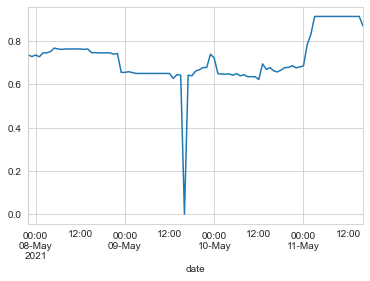

In [109]:
df_resample['Exposure_ALL'].plot()

In [145]:
dd_df =calc_MDD(df_resample['Equity'])
# dd_df[['dd','mdd']].plot()
dd_df.tail()

date
2021-05-07 22:00:00     0
2021-05-07 23:00:00     0
2021-05-08 00:00:00     0
2021-05-08 01:00:00     0
2021-05-08 02:00:00     0
                       ..
2021-05-11 12:00:00    66
2021-05-11 13:00:00    66
2021-05-11 14:00:00    66
2021-05-11 15:00:00    66
2021-05-11 16:00:00    66
Freq: H, Name: nw, Length: 91, dtype: int32


,nw,max_peaks_idx,dd,mdd
date,,,,
2021-05-11 12:00:00,6132.696,66,-0.132727,-0.137585
2021-05-11 13:00:00,6132.696,66,-0.132727,-0.137585
2021-05-11 14:00:00,6132.696,66,-0.132727,-0.137585
2021-05-11 15:00:00,6132.696,66,-0.132727,-0.137585
2021-05-11 16:00:00,6285.262,66,-0.111151,-0.137585


In [126]:
dd_df = pd.concat([dd_df,df_resample['Equity']],axis=1)
# dd_df

<AxesSubplot:xlabel='date'>

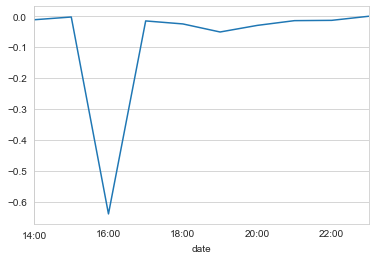

In [144]:
dd_df['dd'].iloc[40:50].plot()

<AxesSubplot:xlabel='date'>

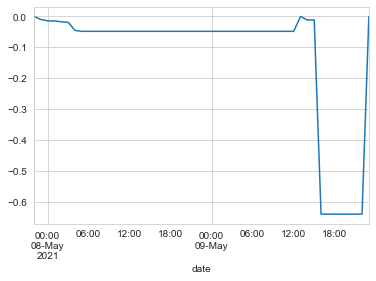

In [133]:
dd_df['mdd'].head(20).plot()

In [83]:
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###


# def show_port():
#     wallet = ex.get_wallet()
#     wallet_df = pd.DataFrame(wallet)

#     df1 = wallet_df[['coin', 'usdValue']]
#     print(df1)
#     return df1




# # df1 = show_port()
# # port_value =df1.sum()['usdValue']
# # print(f'Equity {port_value:2f}')
# # # df_resample['Equity'].plot()
# # pie_chart(df1['usdValue'],df1['coin'],donut=True)

# # plt.title('Portfolio')
# # plt.show()
# # https://medium.com/analytics-vidhya/how-to-get-started-with-stock-performance-analysis-in-python-53378e3b8d74

In [84]:
# df1 = show_port()
# port_value =df1.sum()['usdValue']
# print(f'Equity {port_value:2f}')

In [82]:
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###


# def pie_chart(values,label,donut=False):
#     # plt.show()
#     fig1, ax1 = plt.subplots()
#     ax1.pie(values,labels = label,shadow=False, startangle=90, pctdistance=0.75,autopct= '%1.1f%%')
#     # ax1.axis('equal')
#     plt.tight_layout()
#     if donut ==True:
#         centre_circle = plt.Circle((0, 0), 0.70, fc='white')
#         fig = plt.gcf()
#         fig.gca().add_artist(centre_circle)
#     # plt.pie(wallet_data['usdValue'], labels  = wallet_data['coin'])
#     plt.show()

#     #Seaborn Horizontal barplot 
# # https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
# def plot_bar():
#     wallet = ex.get_wallet()
#     wallet_df = pd.DataFrame(wallet)
#     df1 = wallet_df[['coin', 'usdValue']]
#     df1['usdValue'] = df1['usdValue'].astype('float')
#     df_percent = df1.groupby('coin').agg(percentage = ('usdValue', lambda p: p.sum() / df1['usdValue'].sum() * 100) ).round(2)
#     sns.set_style("whitegrid")
#     bar,ax = plt.subplots(figsize=(8,4))
#     ax = sns.barplot(x="percentage", y=df_percent.index, data=df_percent, ci=None, palette="muted",orient='h' ) #swap x ,y 
#     ax.set_title("Portfolio Total Values", fontsize=15)
#     ax.set_xlabel ("Coins",fontsize=12)
#     ax.set_ylabel ("Percentage",fontsize=12)
#     ax.grid(False)
#     sns.despine(bottom = True, left = False)

#     for rect in ax.patches:
#         ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
#     # bar.savefig("Seaborn_Bar_Vertical.png");
#     plt.show()
#     return    df_percent




# df_percent= plot_bar()


In [86]:
# pair= 'LTC/USD'
# ad = last_transcation(pair,limitt=100)
# ad

In [80]:
# ####### Test ###############
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###
### Copy มาไม่ได้ตรวจเท่าไรครับ ###

# def avg_price(df):
#     df.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
#     df['usd_value'] = df['amount'] * df['price']
#     df['adj_amount'] = df.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)
#     df['adj_amount'] = df.groupby('symbol')['adj_amount'].cumsum()
#     df['adj_price'] = df.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)
#     df['adj_price'] = df.groupby('symbol')['adj_price'].cumsum().div(df['adj_amount'])
#     return df



# trade_history= avg_price(ad)
# avg_buy_price =trade_history['adj_price'][-1:]
# avg_buy_price = float(avg_buy_price.values)
# trade_history.append({'adj_amount':18.13},ignore_index=True)

In [75]:
####### Test ###############
####### Test ###############
####### Test ###############



# timeframes ='1d'

# start_date = dt.datetime.now() - dt.timedelta(days=252)
# start_ts = start_date.timestamp()*1000
# end_date = dt.date.today()
# token_name  = ['SOL','MATIC','XLMBULL'] ### tokens name
# ddd ={}
# ohlc_data ={}
# #######################

# for token in token_name:
# # symbols = token_name+'/USD'
#     symbols = token+'/USD'
#     price =get_price(symbols)
#     wallet = ex.get_wallet()
#     wallet = pd.DataFrame(wallet)
#     wallet = wallet[wallet['coin']== token]
#     wallet['usdValue'] = wallet['usdValue'].astype(float)
#     wallet['availableWithoutBorrow'] =wallet['availableWithoutBorrow'].astype(float)
#     wallet['price']=wallet['usdValue'] / wallet['availableWithoutBorrow']

#     hold_value = round( ex.get_token_value(token),2)
#     trade_history = last_transcation(pair= symbols ,limitt=100,sincee=start_ts)# ,formats =since_str
# #     trade_history = pd.DataFrame(Exchange().exchange.fetchMyTrades(token+'/USD', limit=100),
# #                                          columns=['id', 'timestamp', 'datetime', 'symbol', 'side', 'price', 'amount',
# #                                                   'cost',
# #                                                   'fee'])
# #     cost = []
# #     for i in range(len(trade_history)):
# #         cost.append((trade_history['fee'][i]['cost']))  # ใน fee เอาแค่ cost
# #     trade_history['fee'] = cost



#     trade_history.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
#     trade_history['usd_value'] = trade_history['amount'] * trade_history['price']
# #     print(trade_history)
#     trade_history['adj_amount'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)
#     trade_history['adj_amount'] = trade_history.groupby('symbol')['adj_amount'].cumsum()

#     trade_history['adj_price'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)
#     trade_history['adj_price'] = trade_history.groupby('symbol')['adj_price'].cumsum().div(trade_history['adj_amount'])
# #### Selected row for first data trades 
#     avg_buy_price =trade_history['adj_price'][-1:]
#     avg_buy_price = float(avg_buy_price.values)

#     df= get_data(symbols)
#     ohlc_data[token] =df
#     roc_7,close_7 = Roc(df)
#     df_buy  = trade_history[trade_history['side'] == 'buy']
#     cost_buy= (df_buy['price']*df_buy['amount'] ) .sum()
#     sum_amount = df_buy['amount'].sum()
#     avg_buy = cost_buy / sum_amount
#     buy_cost =df_buy['cost'].sum()



#     df_sell  = trade_history[trade_history['side'] == 'sell']
#     cost_sell= (df_sell['price']*df_sell['amount'] ) .sum()
#     sum_amount_sell = df_sell['amount'].sum()
#     if sum_amount_sell > 0.0 :
#         avg_sell = cost_sell / sum_amount_sell
#     else :
#         sum_amount_sell = 0.0
#         avg_sell = cost_sell / sum_amount_sell

#     sell_cost =df_sell['cost'].sum()
#     # diff= sell_cost - buy_cost

#     price_now = ex.get_price(symbols)
#     unit =hold_value / price_now

#     pnl_p = (price_now - avg_buy_price) / avg_buy_price 
#     diff  = sell_cost - buy_cost
#     real_pnl =  hold_value +diff
#     real_pnl_p = (real_pnl) / buy_cost 
#     unreal_pnl = (hold_value + sell_cost)  - buy_cost
#     unreal_pnl_p = unreal_pnl / buy_cost
# #     print(roc_7,close_7)
#     # real_pnl =  (hold_value - buy_cost ) +sell_cost
#     print(f'{symbols} Sum Buy {buy_cost} : Sum Sell {sell_cost} ')
# #     print(f'Hold Value {hold_value}$ AvgBuy {avg_buy_price} : Now {price_now}')
#     # print(f'UnrealizePnL {unreal_pnl_p*100}% : {unreal_pnl}$ ')
# #     print(f' Cashflow {diff} RealizePnL {real_pnl_p*100}% : {real_pnl}$ ')
#     print('#'*50)
#     dict_wallet = {'price':price,'unit':unit,'hold_value':hold_value, 'avg_buy':avg_buy_price,'sum_buy':buy_cost,'sum_sell':sell_cost,'cf':diff ,'UnPnL':unreal_pnl,'UnPnl%':unreal_pnl_p,'close_7':close_7,'roc_7':roc_7}
#     ddd[token] = dict_wallet
# report = pd.DataFrame(ddd)
# report.T

In [76]:
# import datetime as dt
# since_trade = dt.datetime.now() - dt.timedelta(days=180)
# since_str = end_date.strftime('%Y-%m-%d')
# ts_stamp  = since_trade.timestamp()
# ts_stampx= ts_stamp *1000

# ts = int("1284101485")
# # dt.datetime.fromtimestamp(ts_stamp).strftime('%Y-%m-%d %H:%M:%S')
# ddd ={}
# ohlc_data ={}

In [124]:
#     token = 'SOL'
# # for token in token_name:
# # symbols = token_name+'/USD'
#     symbols = token+'/USD'
#     price =get_price(symbols)
#     wallet = ex.get_wallet()
#     wallet = pd.DataFrame(wallet)
#     wallet = wallet[wallet['coin']== token]
#     wallet['usdValue'] = wallet['usdValue'].astype(float)
#     wallet['availableWithoutBorrow'] =wallet['availableWithoutBorrow'].astype(float)
#     wallet['price']=wallet['usdValue'] / wallet['availableWithoutBorrow']

#     hold_value = round( ex.get_token_value(token),2)


In [135]:
#     trade_history = last_transcation(pair= symbols ,limitt=100,sincee=start_ts)
#     trade_history.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
#     trade_history['usd_value'] = trade_history['amount'] * trade_history['price']
#     trade_history= trade_history.iloc[7:]
# #     print(trade_history)
#     trade_history['adj_amount'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)
#     trade_history['adj_amount'] = trade_history.groupby('symbol')['adj_amount'].cumsum()

#     trade_history['adj_price'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)
#     trade_history['adj_price'] = trade_history.groupby('symbol')['adj_price'].cumsum().div(trade_history['adj_amount'])

#     #### Selected row for first data trades 
#     avg_buy_price =trade_history['adj_price'][-1:]
#     avg_buy_price = float(avg_buy_price.values)

#     df= get_data(symbols)
#     ohlc_data[token] =df
#     roc_7,close_7 = Roc(df)
#     df_buy  = trade_history[trade_history['side'] == 'buy']
#     cost_buy= (df_buy['price']*df_buy['amount'] ) .sum()
#     sum_amount = df_buy['amount'].sum()
#     avg_buy = cost_buy / sum_amount
#     buy_cost =df_buy['cost'].sum()



#     df_sell  = trade_history[trade_history['side'] == 'sell']
#     cost_sell= (df_sell['price']*df_sell['amount'] ) .sum()
#     sum_amount_sell = df_sell['amount'].sum()
#     if sum_amount_sell > 0.0 :
#         avg_sell = cost_sell / sum_amount_sell
#     else :
#         sum_amount_sell = 0.0
#         avg_sell = cost_sell / sum_amount_sell

#     sell_cost =df_sell['cost'].sum()
#     # diff= sell_cost - buy_cost

#     price_now = ex.get_price(symbols)
#     unit =hold_value / price_now

#     pnl_p = (price_now - avg_buy_price) / avg_buy_price 
#     diff  = sell_cost - buy_cost
#     real_pnl =  hold_value +diff
#     real_pnl_p = (real_pnl) / buy_cost 
#     unreal_pnl = (hold_value + sell_cost)  - buy_cost
#     unreal_pnl_p = unreal_pnl / buy_cost
# #     print(roc_7,close_7)
#     # real_pnl =  (hold_value - buy_cost ) +sell_cost
#     print(f'{symbols} Sum Buy {buy_cost} : Sum Sell {sell_cost} ')
# #     print(f'Hold Value {hold_value}$ AvgBuy {avg_buy_price} : Now {price_now}')
#     # print(f'UnrealizePnL {unreal_pnl_p*100}% : {unreal_pnl}$ ')
# #     print(f' Cashflow {diff} RealizePnL {real_pnl_p*100}% : {real_pnl}$ ')
#     print('#'*50)
#     dict_wallet = {'price':price,'unit':unit,'hold_value':hold_value, 'avg_buy':avg_buy_price,'sum_buy':buy_cost,'sum_sell':sell_cost,'cf':diff ,'UnPnL':unreal_pnl,'UnPnl%':unreal_pnl_p,'close_7':close_7,'roc_7':roc_7}
#     ddd[token] = dict_wallet
# trade_history

            id      timestamp                  datetime   symbol  side  \
7   1950381032  1620408459417  2021-05-07T17:27:39.417Z  SOL/USD   buy   
8   1950905663  1620410928597  2021-05-07T18:08:48.597Z  SOL/USD   buy   
9   1953468421  1620424704170  2021-05-07T21:58:24.170Z  SOL/USD   buy   
10  1959693673  1620460879082  2021-05-08T08:01:19.082Z  SOL/USD  sell   
11  1963417157  1620484748306  2021-05-08T14:39:08.306Z  SOL/USD  sell   
12  1964680443  1620489484333  2021-05-08T15:58:04.333Z  SOL/USD   buy   
13  1964761812  1620489623445  2021-05-08T16:00:23.445Z  SOL/USD  sell   
14  1964763376  1620489626391  2021-05-08T16:00:26.391Z  SOL/USD  sell   
15  1965588727  1620492420766  2021-05-08T16:47:00.766Z  SOL/USD  sell   
16  1980612456  1620564963897  2021-05-09T12:56:03.897Z  SOL/USD   buy   
17  1982839681  1620576072654  2021-05-09T16:01:12.654Z  SOL/USD   buy   
18  1988882530  1620612042555  2021-05-10T02:00:42.555Z  SOL/USD  sell   
19  1995320008  1620644862822  2021-05

SOL/USD Sum Buy 10748.17475 : Sum Sell 13054.62325 
##################################################


,id,timestamp,datetime,symbol,side,price,amount,cost,fee,usd_value,adj_amount,adj_price
7,1950381032,1620408459417,2021-05-07T17:27:39.417Z,SOL/USD,buy,44.7725,1.1,49.24975,0.000209,49.24975,1.1,44.772500
8,1950905663,1620410928597,2021-05-07T18:08:48.597Z,SOL/USD,buy,43.9750,1.1,48.37250,0.000209,48.37250,2.2,44.373750
9,1953468421,1620424704170,2021-05-07T21:58:24.170Z,SOL/USD,buy,42.8575,1.4,60.00050,0.000266,60.00050,3.6,43.784097
10,1959693673,1620460879082,2021-05-08T08:01:19.082Z,SOL/USD,sell,43.9525,1.1,48.34775,0.009186,48.34775,2.5,43.710000
11,1963417157,1620484748306,2021-05-08T14:39:08.306Z,SOL/USD,sell,44.8625,1.1,49.34875,0.009376,49.34875,1.4,42.804464
12,1964680443,1620489484333,2021-05-08T15:58:04.333Z,SOL/USD,buy,43.6050,1.3,56.68650,0.000247,56.68650,2.7,43.189907
13,1964761812,1620489623445,2021-05-08T16:00:23.445Z,SOL/USD,sell,43.7400,1.9,83.10600,0.015790,83.10600,0.8,41.883437
14,1964763376,1620489626391,2021-05-08T16:00:26.391Z,SOL/USD,sell,43.7400,9.6,419.90400,0.079782,419.90400,-8.8,43.908778
15,1965588727,1620492420766,2021-05-08T16:47:00.766Z,SOL/USD,sell,44.6850,0.9,40.21650,0.007641,40.21650,-9.7,43.980799
16,1980612456,1620564963897,2021-05-09T12:56:03.897Z,SOL/USD,buy,43.6700,0.9,39.30300,0.000171,39.30300,-8.8,44.012585


In [130]:
# report = pd.DataFrame(ddd)
# report.T

,UnPnL,UnPnl%,avg_buy,cf,close_7,hold_value,price,roc_7,sum_buy,sum_sell,unit
SOL,2464.07125,0.232667,42.483987,2464.07125,33.2725,0.0,33.9075,1.728154,10590.552,13054.62325,0.0


In [147]:
# trade_history = last_transcation(pair= symbols ,limitt=100,sincee=start_ts)
# trade_history.sort_values(['timestamp','symbol','side'], ascending=[True,True, True], inplace=True)
# trade_history['usd_value'] = trade_history['amount'] * trade_history['price']
# trade_history= trade_history.iloc[7:]
# #     print(trade_history)
# trade_history['adj_amount'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['amount'], axis = 1)

# trade_history['adj_amount'] = trade_history.groupby('symbol')['adj_amount'].cumsum()

# trade_history['adj_price'] = trade_history.apply(lambda x: ((x.side == "buy") - (x.side == "sell")) * x['usd_value'], axis = 1)

# trade_history['adj_price'] = trade_history.groupby('symbol')['adj_price'].cumsum().div(trade_history['adj_amount'])
# trade_history

,id,timestamp,datetime,symbol,side,price,amount,cost,fee,usd_value,adj_amount,adj_price
7,1950381032,1620408459417,2021-05-07T17:27:39.417Z,SOL/USD,buy,44.7725,1.1,49.24975,0.000209,49.24975,1.1,44.772500
8,1950905663,1620410928597,2021-05-07T18:08:48.597Z,SOL/USD,buy,43.9750,1.1,48.37250,0.000209,48.37250,2.2,44.373750
9,1953468421,1620424704170,2021-05-07T21:58:24.170Z,SOL/USD,buy,42.8575,1.4,60.00050,0.000266,60.00050,3.6,43.784097
10,1959693673,1620460879082,2021-05-08T08:01:19.082Z,SOL/USD,sell,43.9525,1.1,48.34775,0.009186,48.34775,2.5,43.710000
11,1963417157,1620484748306,2021-05-08T14:39:08.306Z,SOL/USD,sell,44.8625,1.1,49.34875,0.009376,49.34875,1.4,42.804464
12,1964680443,1620489484333,2021-05-08T15:58:04.333Z,SOL/USD,buy,43.6050,1.3,56.68650,0.000247,56.68650,2.7,43.189907
13,1964761812,1620489623445,2021-05-08T16:00:23.445Z,SOL/USD,sell,43.7400,1.9,83.10600,0.015790,83.10600,0.8,41.883437
14,1964763376,1620489626391,2021-05-08T16:00:26.391Z,SOL/USD,sell,43.7400,9.6,419.90400,0.079782,419.90400,-8.8,43.908778
15,1965588727,1620492420766,2021-05-08T16:47:00.766Z,SOL/USD,sell,44.6850,0.9,40.21650,0.007641,40.21650,-9.7,43.980799
16,1980612456,1620564963897,2021-05-09T12:56:03.897Z,SOL/USD,buy,43.6700,0.9,39.30300,0.000171,39.30300,-8.8,44.012585


In [156]:
#     #### Selected row for first data trades 
#     avg_buy_price =trade_history['adj_price'][-1:]
#     avg_buy_price = float(avg_buy_price.values)

#     df= get_data(symbols)
#     ohlc_data[token] =df
#     roc_7,close_7 = Roc(df)
#     df_buy  = trade_history[trade_history['side'] == 'buy']
#     print(df_buy)
#     cost_buy= (df_buy['price']*df_buy['amount'] ) .sum()
#     sum_amount = df_buy['amount'].sum()
#     avg_buy = cost_buy / sum_amount
#     buy_cost =df_buy['cost'].sum()
#     print(f'Buy Cost {buy_cost}')

#     df_sell  = trade_history[trade_history['side'] == 'sell']
#     cost_sell= (df_sell['price']*df_sell['amount'] ) .sum()
#     sum_amount_sell = df_sell['amount'].sum()
#     if sum_amount_sell > 0.0 :
#         avg_sell = cost_sell / sum_amount_sell
#     else :
#         sum_amount_sell = 0.0
#         avg_sell = cost_sell / sum_amount_sell

#     sell_cost =df_sell['cost'].sum()
#     print(sell_cost)
#     # diff= sell_cost - buy_cost

#     price_now = ex.get_price(symbols)
#     unit =hold_value / price_now

#     pnl_p = (price_now - avg_buy_price) / avg_buy_price 
#     diff  = sell_cost - buy_cost
#     real_pnl =  hold_value +diff
#     real_pnl_p = (real_pnl) / buy_cost 
#     unreal_pnl = (hold_value + sell_cost)  - buy_cost
#     unreal_pnl_p = unreal_pnl / buy_cost
#     print(diff)
# df_sell

            id      timestamp                  datetime   symbol side  \
7   1950381032  1620408459417  2021-05-07T17:27:39.417Z  SOL/USD  buy   
8   1950905663  1620410928597  2021-05-07T18:08:48.597Z  SOL/USD  buy   
9   1953468421  1620424704170  2021-05-07T21:58:24.170Z  SOL/USD  buy   
12  1964680443  1620489484333  2021-05-08T15:58:04.333Z  SOL/USD  buy   
16  1980612456  1620564963897  2021-05-09T12:56:03.897Z  SOL/USD  buy   
17  1982839681  1620576072654  2021-05-09T16:01:12.654Z  SOL/USD  buy   
19  1995320008  1620644862822  2021-05-10T11:07:42.822Z  SOL/USD  buy   
20  2001357457  1620669625309  2021-05-10T18:00:25.309Z  SOL/USD  buy   
21  2003555774  1620676576010  2021-05-10T19:56:16.010Z  SOL/USD  buy   
22  2004181883  1620677120542  2021-05-10T20:05:20.542Z  SOL/USD  buy   
23  2004334730  1620677203688  2021-05-10T20:06:43.688Z  SOL/USD  buy   
31  2039651813  1620833455946  2021-05-12T15:30:55.946Z  SOL/USD  buy   
39  2335772598  1621858786507  2021-05-24T12:19:46.

,id,timestamp,datetime,symbol,side,price,amount,cost,fee,usd_value,adj_amount,adj_price
10,1959693673,1620460879082,2021-05-08T08:01:19.082Z,SOL/USD,sell,43.9525,1.1,48.34775,0.009186,48.34775,12.5,8.742000
11,1963417157,1620484748306,2021-05-08T14:39:08.306Z,SOL/USD,sell,44.8625,1.1,49.34875,0.009376,49.34875,11.4,5.256689
13,1964761812,1620489623445,2021-05-08T16:00:23.445Z,SOL/USD,sell,43.7400,1.9,83.10600,0.015790,83.10600,10.8,3.102477
14,1964763376,1620489626391,2021-05-08T16:00:26.391Z,SOL/USD,sell,43.7400,9.6,419.90400,0.079782,419.90400,1.2,-321.997708
15,1965588727,1620492420766,2021-05-08T16:47:00.766Z,SOL/USD,sell,44.6850,0.9,40.21650,0.007641,40.21650,0.3,-1422.045833
18,1988882530,1620612042555,2021-05-10T02:00:42.555Z,SOL/USD,sell,45.2400,1.1,49.76400,0.009455,49.76400,10.8,3.308472
24,2017384043,1620726097921,2021-05-11T09:41:37.921Z,SOL/USD,sell,41.0250,1.9,77.94750,0.014810,77.94750,16.4,16.519116
25,2022887409,1620750077137,2021-05-11T16:21:17.137Z,SOL/USD,sell,41.9325,1.3,54.51225,0.010357,54.51225,15.1,14.331209
26,2025039662,1620762535758,2021-05-11T19:48:55.758Z,SOL/USD,sell,42.9150,1.3,55.78950,0.010600,55.78950,13.8,11.638533
27,2025743725,1620766872784,2021-05-11T21:01:12.784Z,SOL/USD,sell,43.7725,1.1,48.14975,0.009148,48.14975,12.7,8.855276


In [ ]:
# walllet_list = pd.DataFrame(ddd).T
# # walllet_list['diff_avg'] =(walllet_list['price']-walllet_list['avg_buy']) / walllet_list['avg_buy'] ### % diff
# # walllet_list['Turnover'] = walllet_list['sum_sell'] / walllet_list['hold_value']
# # #entry 6300
# # walllet_list['cf'] + walllet_list['hold_value']
# # walllet_list['diff_7'][walllet_list.index == 'SOL'] 
# walllet_list

In [ ]:
# # # sum_cf=round((walllet_list['sum_sell'].sum() -walllet_list['sum_buy'].sum()) +walllet_list['hold_value'].sum(),3)
# # # entry =6300
# # # sum_cf_p = round(sum_cf  /entry *100,3)
# # # print(f'Cash flow {sum_cf} CashFlow% {sum_cf_p}%')
# # df_listings =  df.loc[np.random.permutation(len(df))]
# # df_listings

# # walllet_list.loc[walllet_list.index =='MATIC']
# # (walllet_list.loc[walllet_list.index =='MATIC']['sum_buy'] + walllet_list.loc[walllet_list.index =='MATIC']['sum_sell'] )*0.05


# df['symbols_name']=df['symbol'].str.replace('/USD','')
# df

In [ ]:
# token_name  = ['SOL','MATIC','XLMBULL','BTC','ETH','UNI','DOGE']
# symbol_lists= ['1INCH/USD','SOL/USD','RAY/USD','SRM/USD','BTC/USD','ETH/USD','XRP/USD','AAVE/USD','UNI/USD','ALPHA/USD','BNB/USD','FTT/USD','LINA/USD','DOGE/USD','BAL/USD','MATIC/USD']
# timeframes ='1d'

# start_date = dt.datetime.now() - dt.timedelta(days=100)
# start_ts = start_date.timestamp()*1000
# end_date = dt.date.today()
# ddd ={}
# for symbol in symbol_lists:
#     token =symbol.split('/')[0]
# #     symbols = token+ '/USD'
#     df = pd.DataFrame(Exchange().exchange.fetch_ohlcv(symbol,timeframe=timeframes, since=start_ts),columns=['date','open','high','low','close','volume'])['close']
#     ddd[token] = df

In [ ]:
# shuffled_index = np.random.permutation(df.index)
# df.reindex(shuffled_index)